### Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


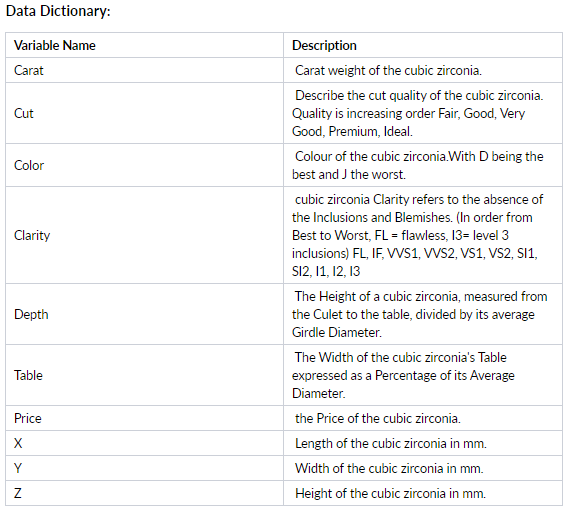

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
# Import stats from scipy
from scipy import stats
from scipy.stats import zscore 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Question 1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.1:
    
### Performing Basic Data Exploration:
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

- Head of the dataset
- Shape of the dataset
- Info of the dataset
- Summary of the dataset

**We will  be loading the given Data file using pandas.**
    


In [2]:
df=pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


**Head function will tell the top records in the data set. By default python shows you only top 5 records.**

#### Dropping the 'Unnamed' column as it is not usefull for the model.

In [4]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
print('The number of rows of the dataframe is',df.shape[0],'.')

print('The number of columns of the dataframe is',df.shape[1],'.')

The number of rows of the dataframe is 26967 .
The number of columns of the dataframe is 10 .


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


**info() is being used to check the Information about the data and the data types of each respective attributes.**

**The following are the observation:**
- Total of 10 variables
- There are 7 numeric variables and 3 categorical variables
- There is some missing value in the dataset

In [7]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

**There are 697 missing value in "depth" attribute**

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


#### It is observed that minimum value of X,Y and Z is 0. We have to check the data in detail, as it may be error as dimension of a stone cannot be zero.

### Checking for any kind of special values like " ? ", any string Or  any negative number etc. in the variables

In [9]:
for column in df.columns:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CARAT :  257
3.51       1
4.00       1
2.64       1
2.41       1
2.80       1
        ... 
0.32     950
0.70     959
1.01    1111
0.31    1118
0.30    1331
Name: carat, Length: 257, dtype: int64


CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64


DEPTH :  169
68.6       1
69.9       1
70.2       1
53.1       1
72.9       1
        ... 
62.2     977
61.8    1012
62.1    1016
61.9    1091
62.0    1131
Name: depth, Length: 169, dtype: int64


TABLE :  112
58.7       1
59.3       1
63.3       1
61.8       1
58.6       1
        ... 
55.0    3136
59.0    3302
58.0    4258
57.0    4781
56.0    4988
Name: table, Length: 112, dtype: int64


X :  531
9.30      1
9.

#### There is no special character or -ve value in the variables.

### Checking for the rows where X,Y and Z have 0 value, as we have seen 0 values as minimum in X,Y and Z variable.

In [10]:
X0 = df[df['x'] == 0]
X0

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [11]:
Y0 = df[df['y'] == 0]
Y0

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [12]:
Z0 = df[df['z'] == 0]
Z0

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


### The above rows will be dropped where any of the X, Y and Z values are 0. It should not affect the overall model as there are 9 such entries out of total 26968.

In [13]:
df.drop(df[df['x'] == 0].index, inplace = True)
df.drop(df[df['y'] == 0].index, inplace = True)
df.drop(df[df['z'] == 0].index, inplace = True)

In [14]:
df.shape

(26958, 10)

### Checking for duplicate data :

In [15]:
dups = df.duplicated()
print("No. of duplicate rows in our data",dups.sum())
df[dups]

No. of duplicate rows in our data 33


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
14389,0.60,Premium,D,SI2,62.0,57.0,5.43,5.35,3.34,1196


#### It shows that there is 33 duplicate data. We will discard the duplicate data as the number of entries are small compared to total entries.

In [16]:
print('Before',df.shape)
df.drop_duplicates(inplace=True)
print('After',df.shape)

Before (26958, 10)
After (26925, 10)


In [17]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [18]:
df['depth'].median()

61.8

In [19]:
df['depth'].mean()

61.74557343297287

### As there are 697 entries with null values, we will impute the null values with median values. Moreover, from info() function, it is seen that the mean and median values are very similar.

In [20]:
df['depth'] = df['depth'].fillna(df['depth'].median())
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


## Uni-variate analysis

### Numerical variables

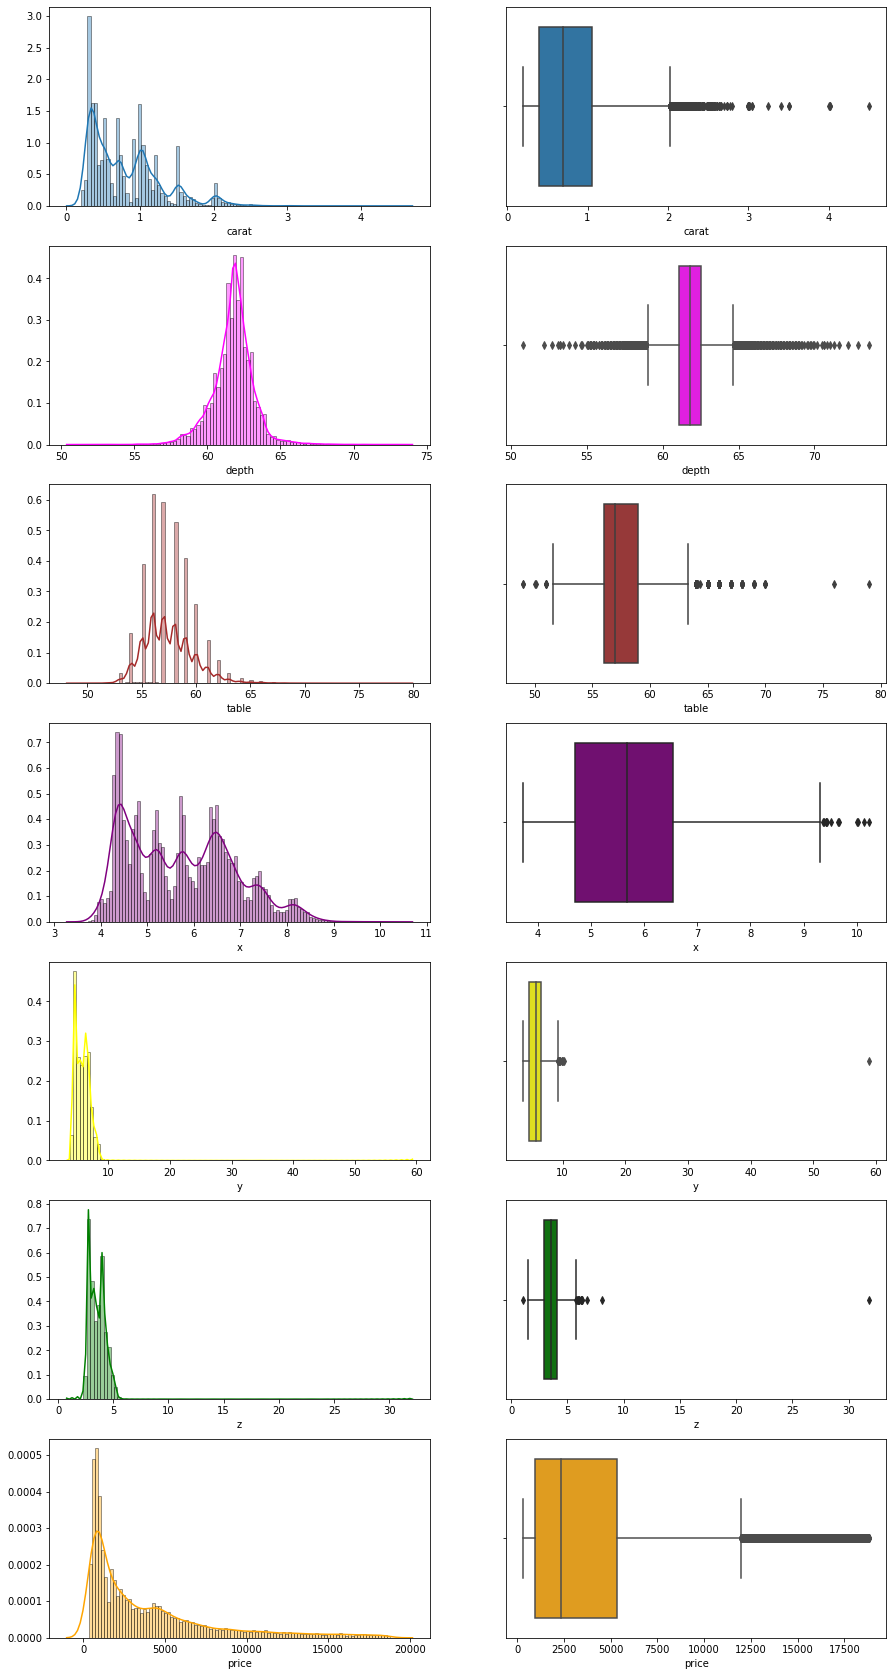

In [22]:
fig, axs=plt.subplots(nrows= 7, ncols= 2, figsize=(15,30))
sns.distplot(df['carat'], bins= 100, hist_kws=dict(ec='black'), ax=axs[0][0])
sns.distplot(df['depth'], bins= 100, hist_kws=dict(ec='black'), ax=axs[1][0], color='magenta')
sns.distplot(df['table'], bins= 100, hist_kws=dict(ec='black'), ax=axs[2][0], color='brown')
sns.distplot(df['x'], bins= 100, hist_kws=dict(ec='black'), ax=axs[3][0], color='purple')
sns.distplot(df['y'], bins= 100, hist_kws=dict(ec='black'), ax=axs[4][0], color='yellow')
sns.distplot(df['z'], bins= 100, hist_kws=dict(ec='black'), ax=axs[5][0], color='green')
sns.distplot(df['price'], bins= 100, hist_kws=dict(ec='black'), ax=axs[6][0], color='orange')
sns.boxplot(df['carat'], ax=axs[0][1])
sns.boxplot(df['depth'], ax=axs[1][1], color='magenta')
sns.boxplot(df['table'], ax=axs[2][1], color='brown')
sns.boxplot(df['x'], ax=axs[3][1], color='purple')
sns.boxplot(df['y'], ax=axs[4][1], color='yellow')
sns.boxplot(df['z'], ax=axs[5][1], color='green')
sns.boxplot(df['price'], ax=axs[6][1], color='orange')
plt.show()

#### There are  outliers in the all the variables. The variable "depth" has near normal distribution. Others are skewed or multimodal distribution.

#### Linear Regression models are sometimes sensitive to outliers and that is solely dependent on the quality of data. In this present dataset, the dependent variable "price" and Independent variable "depth" & "Carat" have large number of outliers, but these data may not be wrong/stray data. However, to put the model into production, it makes sense to treat the outliers of the independent variables. 

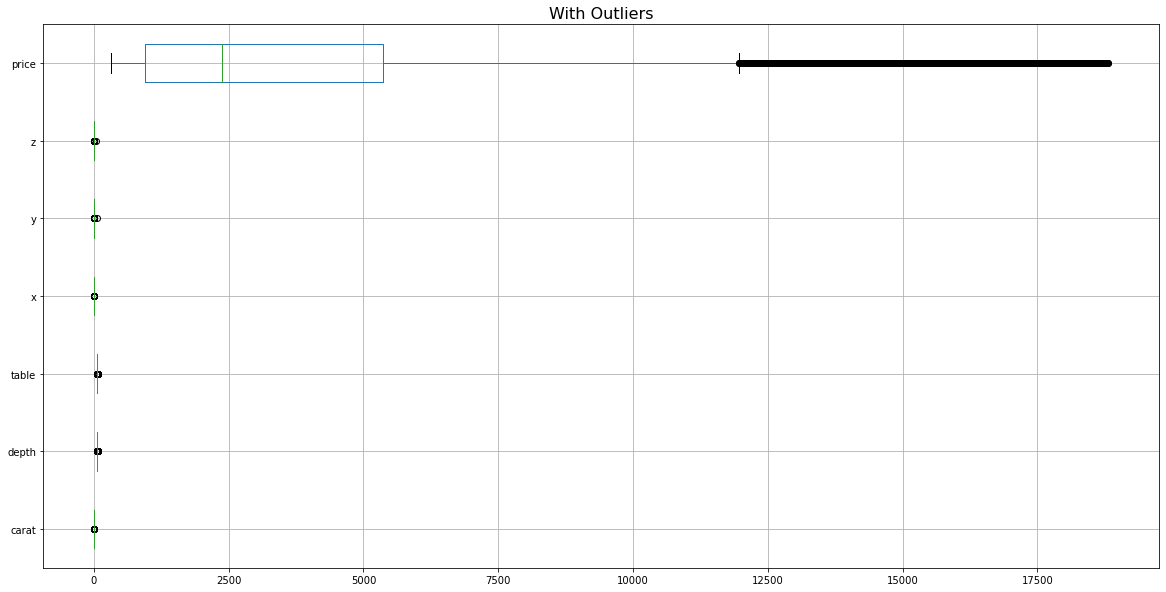

In [23]:
OUTLIER=df.dtypes[(df.dtypes!='object') & (df.dtypes!='bool')].index
plt.figure(figsize=(20,10))
df[OUTLIER].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

### Categorical variables

In [24]:
df.cut.value_counts()

Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64

In [25]:
df.color.value_counts()

G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [26]:
df.clarity.value_counts()

SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

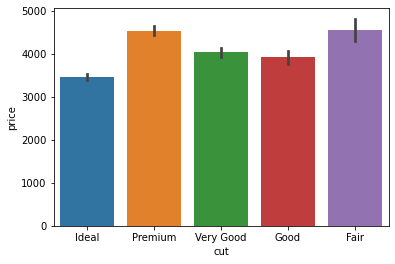

In [27]:
sns.barplot(x ='cut',y ='price',data= df)

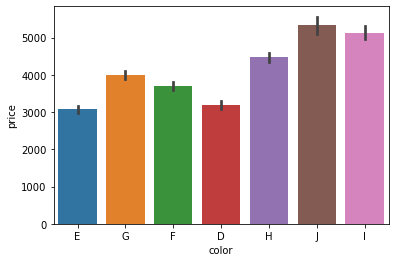

In [28]:
sns.barplot(x ='color',y ='price',data= df)

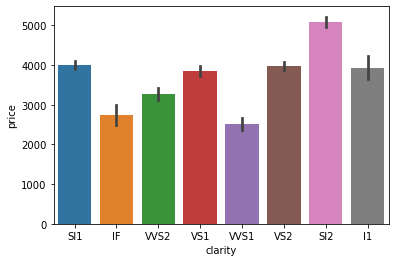

In [29]:
sns.barplot(x ='clarity',y ='price',data= df)

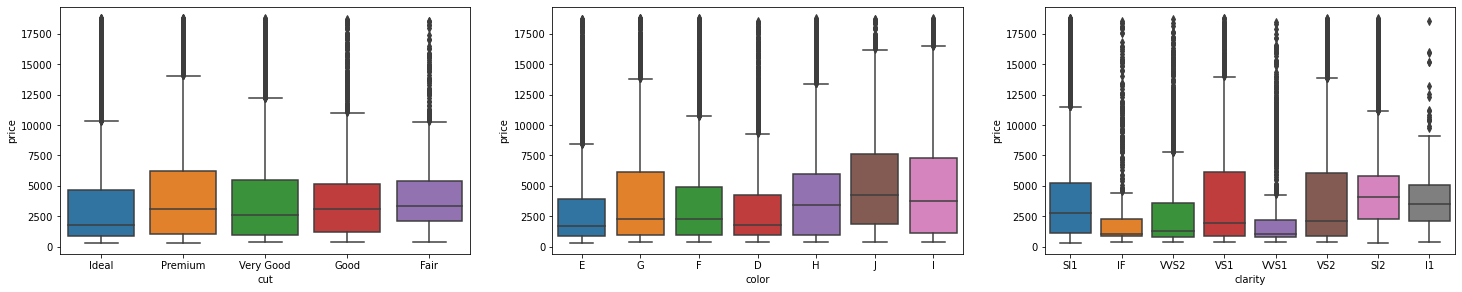

In [30]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'cut', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'color', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'clarity', y = 'price', data = df)

#### Insights from categorical variables which are influencing target variable 'Price'

#### Cut - Premium and Fair have high average prices.

#### Color - I and J have higher prices and D and E have lowest prices.

#### Clarity - SI2 has highest price, WS1 has the lowest average price.

#### So, these attributes will have effect on the price predictions.


## Bi-variate Analysis

### Data Distribution

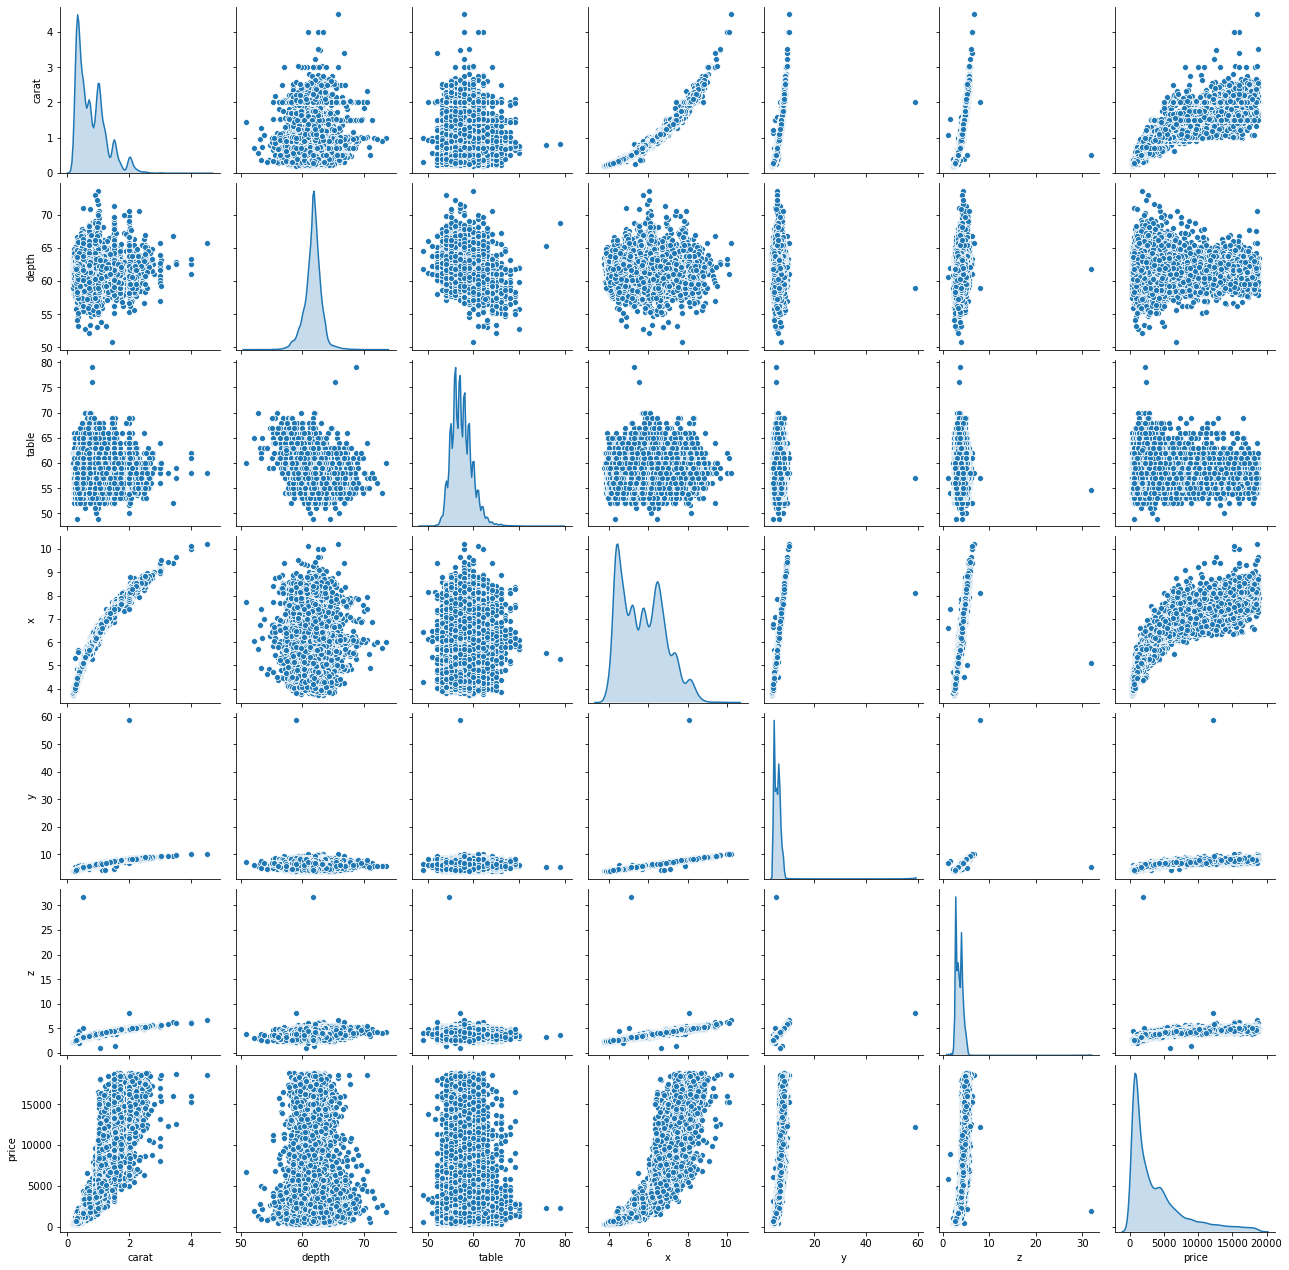

In [31]:
df_pair = (df[OUTLIER])
sns.pairplot(df_pair, diag_kind='kde')  
plt.show()

#### It is observed that carat, x, y, z are positively corelated with price.

### Correlation between columns

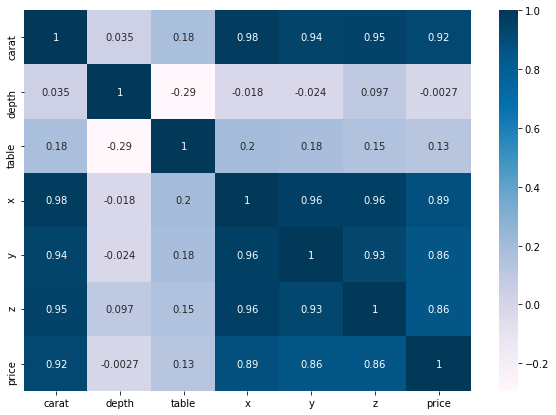

In [32]:
plt.figure(figsize=(10,7))
corr_data = df[OUTLIER].corr()
sns.heatmap(corr_data,annot=True,cmap='PuBu');

#### Insights from corelation study

#### Carat, X, Y, Z and Price are highly corelated, which is very obvious in case of gem stones business, bigger the stone, costlier it is.

### Treating outliers (ONLY independent variables)


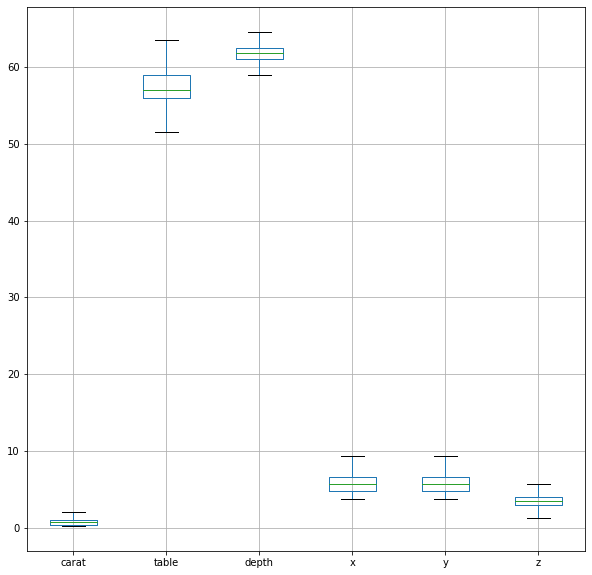

In [33]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range, upper_range


for feature in df[['carat', 'table', 'depth', 'x', 'y', 'z']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])
    
plt.figure(figsize=(10,10))
df[['carat', 'table', 'depth', 'x', 'y', 'z']].boxplot()

### Observations/Inferences:

The following are the observation from basic descriptive stats:

There are total of 10 variables out of which 7 are  numeric.

All the data distributions are either slightly skewed or bimodal except the variable "depth" which has near normal distribution.

There are outliers in the dataset. But it is decided to treat the outliers of independent variables.

There are 33 duplicate rows and was dropped.

There were 697 missing value in the dataset and was imputed with median values.

Carat, X, Y, Z and Price are highly corelated, which is very obvious in case of gem stones business as bigger the stone, costlier it is.

Cut, color, clarity attributes have also impact on price. Some specific levels of these 3 attributes have significant impact on price , e.g. Premium and Fair have high average prices.

### Question 1.2) Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.2:

#### Imputing has been done in null values with median values.
    
#### Scaling is not necessary, but recommended for regression techniques because it would help gradient descent to converge fast and reach the global minima. When number of features becomes large, it helps in running the model quickly, else the starting point would be very far from minima, if the scaling is not done in preprocessing. So, It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.5+ MB


### Question 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.3:

### Encoding the categorical features

In [35]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [41]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,2,4,1,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,4,2,7,61.8,56.0,4.19,4.20,2.60,682


from scipy.stats import zscore
df=df.apply(zscore)
df.head()

### Splitting data into training and test set

In [42]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

#### We will split the dataset into 70% training data and 30% of testing data.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.30, random_state = 5)

In [44]:
X_train  = X_train.apply(zscore)
X_test = X_test.apply(zscore)
y_train = y_train.apply(zscore)
y_test = y_test.apply(zscore)

#### Checking the dimensions of the training and test data

In [45]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (18847, 9)
X_test (8078, 9)
y_train (18847, 1)
y_test (8078, 1)


In [46]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [47]:
# regression_model.coef_

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.6524748246832783
The coefficient for cut is 0.011103807102565755
The coefficient for color is -0.11835513638508643
The coefficient for clarity is 0.11526958019956546
The coefficient for depth is -0.029041231932060665
The coefficient for table is -0.05264774634078896
The coefficient for x is -0.8503661172226804
The coefficient for y is 0.504234945270975
The coefficient for z is -0.3255502211877524


In [48]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7.066803575304188e-16


### So, the final Linear Regression model is,

#### price = Intercept + (1.6524 * carat) +  (0.0111 * cut) - (0.1183 * color) + (0.1152 * clarity) - (0.0290 * depth) - (0.0526 * table) - (0.8503 * x) + (0.5042 * y) - (0.3255 * z)

Here intercept (7.066803575304188e-16) is close to zero as we have scaled the model.

So, it is observed in the regression equation that coeffecients are negative between x and z with price even though pair plot shows positive corelation. So, this may be due to multi collinearity among the variables. This makes sense as x, y, z together refer to total size, and more the size, higher the price.

In [49]:
# R square on training data

# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS
regression_model.score(X_train, y_train)

0.8978030657413915

#### So, 89.8% of the variation in the price is explained by the predictors in the model for train set.

In [50]:
# R square on testing data
regression_model.score(X_test, y_test)

0.896844679609232

#### So, 89.6% of the variation in the price is explained by the predictors in the model for test set.

In [51]:
#RMSE on Training data
mse = np.mean((regression_model.predict(X_train)-y_train)**2)
import math

math.sqrt(mse)

0.3196825523212182

In [52]:
#RMSE on Testing data
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
import math

math.sqrt(mse)

0.32117801978150345

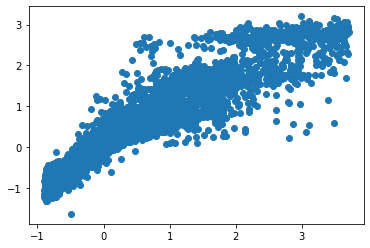

In [53]:
plt.scatter(y_test['price'], regression_model.predict(X_test))

### Linear Regression using statsmodels

In [54]:
# concatenate X and y into a single dataframe
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()
df_test = pd.concat([X_test, y_test], axis=1)
df_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
25448,-0.611735,-0.527068,1.397969,0.669372,0.047908,0.265379,-0.512865,-0.474338,-0.583541,-0.665849
25017,-0.826801,-0.527068,0.812516,-1.065555,-0.196512,-1.126896,-0.840005,-0.821978,-0.840781,-0.791627
20613,0.463596,-2.475650,-0.943841,-0.487246,-2.233338,0.729471,0.813379,0.853824,0.388256,0.164036
17869,-1.041867,-0.527068,0.812516,-1.643864,-0.766823,-0.198713,-1.193670,-1.187445,-1.240933,-0.792125
15531,-0.461189,-0.527068,-0.943841,-0.487246,0.862638,-0.662804,-0.380240,-0.322803,-0.269136,-0.646422


In [55]:
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [56]:
expr= 'price ~ carat + cut + color + clarity + depth + table + x + y + z'

import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = df_train).fit()
lm1.params

Intercept    3.686287e-17
carat        1.652475e+00
cut          1.110381e-02
color       -1.183551e-01
clarity      1.152696e-01
depth       -2.904123e-02
table       -5.264775e-02
x           -8.503661e-01
y            5.042349e-01
z           -3.255502e-01
dtype: float64

In [57]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.839e+04
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:39:01   Log-Likelihood:                -5249.1
No. Observations:               18847   AIC:                         1.052e+04
Df Residuals:                   18837   BIC:                         1.060e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.686e-17      0.002   1.58e-14      1.000      -0.005       0.005
carat          1.6525      0.013    123.848      0.000       1.626       1.679
cut            0.0111      0.002      4.626      0.000       0.006       0.016
color         -0.1184      0.002    -48.422      0.000      -0.123      -0.114
clarity        0.1153      0.002     47.878      0.000       0.111       0.120
depth         -0.0290      0.005     -6.032      0.000      -0.038      -0.020
table         -0.0526      0.003    -20.825      0.000      -0.058      -0.048
x             -0.8504      0.048    -17.775      0.000      -0.944      -0.757
y              0.5042      0.045     11.133      0.000       0.415       0.593
z             -0.3256      0.036     -9.090      0.000      -0.396      -0.255
==============================================================================
Omnibus:                     4891.283   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48340.100
Skew:                           0.963   Prob(JB):                         0.00
Kurtosis:                      10.606   Cond. No.                         53.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testing for Multicollinearity with VIF 

In [58]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [59]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.7660147888945
cut ---> 7.674028323101852
color ---> 3.6684719643883685
clarity ---> 6.3079135741477526
depth ---> 1001.3770837638131
table ---> 730.6192830108478
x ---> 10360.189211972505
y ---> 9462.48763951711
z ---> 2806.317628731724



### So, it is seen that cut, clarity and color has VIF value of around 5. From classical threshold definition , VIF of 1-5 has moderate collinearity among the variables. While other variables like carat, x,y,z etc has larger VIF values. So we can consider that there is significant multicolinearity among these predictor variables. To cite an example, the coeffecients of x and z are not consistent with price trend (x and z decreases, price increases). 

### To handle the effect of multicollinearity, we can try regularisation of the model.

In [60]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Creating a regularized RIDGE model and note the coefficients

In [71]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 1.65133358  0.01114963 -0.11833701  0.11529947 -0.02906091 -0.05268917
  -0.84266006  0.49717886 -0.3250631 ]]


In [72]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8978028740917411
0.8968472550793676


### Creating a regularized LASSO model and note the coefficients

In [73]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.82384473  0.         -0.          0.00225044 -0.         -0.
  0.          0.          0.        ]


In [74]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.843166685549966
0.8433469202433324


### So, it is seen that RIDGE model coeffecients and accuracy are almost same as original unregularized model. But for LASSO model, the number of coeffecients (variables) are reduced to just two numbers (carat and clarity). Moreover, the accuracy score also dropped to a lower value. We could have adopted this LASSO model as final if the number of variables would have been large to handle and we were looking to reduce the variables for better interpretability. 



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">
To conclude, since multicollinearity does not affect the overall accuracy of the model and by considering the high and consistent accuracy score for both training and testing set, we will finalize the original unregularized model for production.

### Question 1.4) Inference: Basis on these predictions, what are the business insights and recommendations.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Answer 1.4:

### A few insights and recommendations from the whole analysis are as follows,

1.  Few categorical variables which are influencing target variable 'Price' (based on EDA)

    Cut - Premium and Fair have high average prices.

    Color - I and J have higher prices and D and E have lowest prices.

    Clarity - SI2 has highest price, WS1 has the lowest average price.

    
2.  The final linear regression model is, 

     Price = Intercept + (1.6524 * carat) + (0.0111 * cut) - (0.1183 * color) + (0.1152 * clarity) - (0.0290 * depth) - (0.0526 * table) - (0.8503 * x) + (0.5042 * y) - (0.3255 * z), 
    
    Here intercept (7.066803575304188e-16) is close to zero as we have scaled the model.

    so, the inference from the co-effecients, when carat increases by 1 unit, price increases by 1.652 units, keeping all other     predictors constant.
    
    similarly, when cut increases by 1 unit, price increases by 0.1 units, keeping all other predictors constant. Also, when color increases by 1 unit, price decreases by 0.118 units, keeping all other predictors constant.


3.  When exploring regularization (LASSO), it is observed that only two variables, carat and clarity have effect on the price prediction. Other variables are not significant for price prediction due to multicollinearity. Even with unregularized final model, it is obvious that carat has multicollinearity elements with x,y,z dimension of the stones.

4. So, going by the Final unregularized model, the 5 most important attributes in price prediction are carat, cut, color, clarity and depth. carat is calculated by taking into account the dimensions x, y and z only.

5. So, the company can focus on those 5 attributes to become largely profitable.

6. Company can plan to manufacture perfect cubic zirconia by combining the best attributes to sell at high price. It may also look to manufacture some affordable stones to book profit on high sales volumes.

7. Company can also collect more data to add some new features such as buyers' detail (age/income etc.) to the analysis/prediction. 

8. Future improvement in the regression modeling can be to develop feature engineering to discard correlated features to make a new relevant feature.